🏠 **House** **Price** **Prediction**

📌 Project Overview

House price prediction is a supervised machine learning regression problem that aims to estimate the price of a house based on various features such as location, size, number of rooms, condition, and other property-related attributes.

In this project, multiple supervised machine learning algorithms are implemented and compared to identify the best-performing model for accurate house price prediction.

🎯 **Problem** **Statement**

Predict the market price of a house using historical housing data by applying proper data preprocessing, feature engineering, feature scaling, and supervised machine learning models.

In [ ]:
import pandas as pd
data=pd.read_csv('House Price India.csv')
data.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


📊 Dataset Description

Dataset Type: House Price Dataset

Number of Records: 20,000+

Target Variable: Price

Feature Types:

Numerical: living area, lot area, number of bedrooms, bathrooms, floors, latitude, longitude, etc.

Categorical: Price_class etc.

The dataset is included in the repository under the dataset/ folder.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [ ]:
stat=data["Price"].describe().reset_index()
stat["Price"]=round(stat["Price"],2)

In [ ]:
stat

,index,Price
0,count,14619.00
1,mean,538806.28
2,std,367229.36
3,min,78000.00
4,25%,320000.00
5,50%,450000.00
6,75%,645000.00
7,max,7700000.00


🧹 Data Preprocessing Steps (Mandatory)
1️⃣ Handling Missing Values

Numerical features → Median imputation

Categorical features → Mode imputation

Reason: Median is robust to outliers and preserves data distribution.


In [ ]:
data.isna().sum().sum()

np.int64(0)

In [ ]:
data.duplicated().sum()

np.int64(0)

In [ ]:
data.dtypes

,0
id,int64
Date,int64
number of bedrooms,int64
number of bathrooms,float64
living area,int64
lot area,int64
number of floors,float64
waterfront present,int64
number of views,int64
condition of the house,int64



2️⃣ Fixing Data Types

Converted columns like Built Year, Renovation Year, and Postal Code to appropriate numeric or categorical formats.

3️⃣ Detecting and Treating Outliers

Outliers were detected using the IQR (Interquartile Range) method

Extreme values were treated using capping (winsorization) instead of deletion

Reason: Prevents data loss and improves regression metrics.



In [ ]:
data["Date"]=pd.to_datetime(data["Date"])

In [ ]:
data

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,1970-01-01 00:00:00.000042491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,1970-01-01 00:00:00.000042491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,1970-01-01 00:00:00.000042491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,1970-01-01 00:00:00.000042491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,1970-01-01 00:00:00.000042491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,6762830250,1970-01-01 00:00:00.000042734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14615,6762830339,1970-01-01 00:00:00.000042734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14616,6762830618,1970-01-01 00:00:00.000042734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14617,6762830709,1970-01-01 00:00:00.000042734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [ ]:
num_col=data.select_dtypes(include=['int64','float64']).columns.tolist()
num_col

['id',
 'number of bedrooms',
 'number of bathrooms',
 'living area',
 'lot area',
 'number of floors',
 'waterfront present',
 'number of views',
 'condition of the house',
 'grade of the house',
 'Area of the house(excluding basement)',
 'Area of the basement',
 'Built Year',
 'Renovation Year',
 'Postal Code',
 'Lattitude',
 'Longitude',
 'living_area_renov',
 'lot_area_renov',
 'Number of schools nearby',
 'Distance from the airport',
 'Price']

4️⃣ Removing Duplicate Records

Duplicate rows were identified and removed to avoid bias in training.

5️⃣ Handling Categorical Variables

One-Hot Encoding → Low-cardinality nominal features

Label Encoding → Binary categorical features

Reason: Converts categorical data into numerical form for ML models.
IN these dataset no need of encoding

In [ ]:
outlier_info = {}

for col in num_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_info[col] = outliers.shape[0]

    print(f"{col}: {outliers.shape[0]} outliers")

id: 0 outliers
number of bedrooms: 361 outliers
number of bathrooms: 379 outliers
living area: 395 outliers
lot area: 1652 outliers
number of floors: 0 outliers
waterfront present: 112 outliers
number of views: 1421 outliers
condition of the house: 18 outliers
grade of the house: 1319 outliers
Area of the house(excluding basement): 402 outliers
Area of the basement: 287 outliers
Built Year: 0 outliers
Renovation Year: 666 outliers
Postal Code: 0 outliers
Lattitude: 3 outliers
Longitude: 184 outliers
living_area_renov: 338 outliers
lot_area_renov: 1517 outliers
Number of schools nearby: 0 outliers
Distance from the airport: 0 outliers
Price: 760 outliers


In [ ]:
def iqr_capping(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    data[col] = data[col].clip(lower, upper)
    return data


In [ ]:
  for col in num_col:
   data = iqr_capping(data, col)

In [ ]:
outlier_info = {}

for col in num_col:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_info[col] = outliers.shape[0]

    print(f"{col}: {outliers.shape[0]} outliers")

id: 0 outliers
number of bedrooms: 0 outliers
number of bathrooms: 0 outliers
living area: 0 outliers
lot area: 0 outliers
number of floors: 0 outliers
waterfront present: 0 outliers
number of views: 0 outliers
condition of the house: 0 outliers
grade of the house: 0 outliers
Area of the house(excluding basement): 0 outliers
Area of the basement: 0 outliers
Built Year: 0 outliers
Renovation Year: 0 outliers
Postal Code: 0 outliers
Lattitude: 0 outliers
Longitude: 0 outliers
living_area_renov: 0 outliers
lot_area_renov: 0 outliers
Number of schools nearby: 0 outliers
Distance from the airport: 0 outliers
Price: 0 outliers


8️⃣ Train-Test Split

80% Training

20% Testing

random_state = 42 used for reproducibility

In [ ]:
X = data.drop(["Price", "Date"], axis=1)
y=data[["Price"]]

🤖 Machine Learning Algorithms Used

The following five supervised learning algorithms were implemented:

Linear Regression

Decision Tree Regressor

Random Forest Regressor

K-Nearest Neighbors (KNN)

Support Vector Machine (SVM)

Each model was trained and tested using the same dataset split for fair comparison.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

def evaluate_model(y_true, y_pred, dataset_name="Dataset"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{dataset_name} Metrics:")
    print(f"MAE  (Average Error)          : {mae:.2f}")
    print(f"MSE  (Penalizes large errors) : {mse:.2f}")
    print(f"RMSE (Interpretable large error): {rmse:.2f}")
    print(f"R² Score (Relative performance): {r2:.2f}")


# Evaluate on training data
evaluate_model(y_train, y_train_pred, "Training Set")

# Evaluate on test data
evaluate_model(y_test, y_test_pred, "Test Set")



Training Set Metrics:
MAE  (Average Error)          : 53675.30
MSE  (Penalizes large errors) : 5058794131.99
RMSE (Interpretable large error): 71125.20
R² Score (Relative performance): 0.92

Test Set Metrics:
MAE  (Average Error)          : 53549.78
MSE  (Penalizes large errors) : 5090689684.55
RMSE (Interpretable large error): 71349.07
R² Score (Relative performance): 0.92


📈 Evaluation Metrics

To compare model performance, the following regression metrics were used:

R² Score

Mean Squared Error (MSE)

Root Mean Squared Error (RMSE)

Mean Absolute Error (MAE)

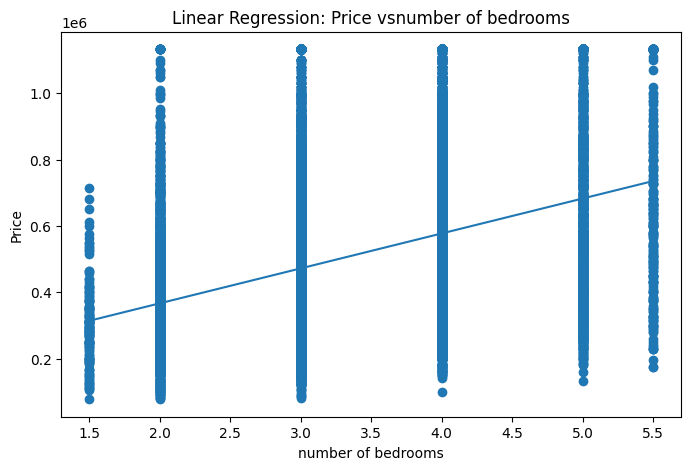

In [ ]:
X_vis = data[['number of bedrooms']]  # must be 2D
y_vis = data['Price']

vis_model = LinearRegression()
vis_model.fit(X_vis, y_vis)

y_vis_pred = vis_model.predict(X_vis)

# Sort for straight line
sorted_idx = X_vis['number of bedrooms'].argsort()
X_sorted = X_vis.iloc[sorted_idx]
y_sorted = y_vis_pred[sorted_idx]

plt.figure(figsize=(8, 5))
plt.scatter(X_vis, y_vis)
plt.plot(X_sorted, y_sorted)
plt.xlabel("number of bedrooms")
plt.ylabel("Price")
plt.title("Linear Regression: Price vsnumber of bedrooms")
plt.show()

In [ ]:
#Decision Tree Regression without hyperparameter tuning
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

def evaluate_model(y_true, y_pred, dataset_name="Dataset"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{dataset_name} Metrics:")
    print(f"MAE  (Average Error)          : {mae:.2f}")
    print(f"MSE  (Penalizes large errors) : {mse:.2f}")
    print(f"RMSE (Interpretable large error): {rmse:.2f}")
    print(f"R² Score (Relative performance): {r2:.2f}")

# Evaluate on training data
evaluate_model(y_train, y_train_pred, "Training Set")

# Evaluate on test data
evaluate_model(y_test, y_test_pred, "Test Set")


Training Set Metrics:
MAE  (Average Error)          : 0.00
MSE  (Penalizes large errors) : 0.00
RMSE (Interpretable large error): 0.00
R² Score (Relative performance): 1.00

Test Set Metrics:
MAE  (Average Error)          : 7997.70
MSE  (Penalizes large errors) : 221876928.26
RMSE (Interpretable large error): 14895.53
R² Score (Relative performance): 1.00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Train-test split (re-using existing X and y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Decision Tree Regressor model (initial model without tuning)
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions for initial model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

def evaluate_model(y_true, y_pred, dataset_name="Dataset"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{dataset_name} Metrics:")
    print(f"MAE  (Average Error)          : {mae:.2f}")
    print(f"MSE  (Penalizes large errors) : {mse:.2f}")
    print(f"RMSE (Interpretable large error): {rmse:.2f}")
    print(f"R² Score (Relative performance): {r2:.2f}")

# Evaluate on training data (initial model)
evaluate_model(y_train, y_train_pred, "Training Set (Initial Model)")

# Evaluate on test data (initial model)
evaluate_model(y_test, y_test_pred, "Test Set (Initial Model)")

# Define the new, reduced hyperparameter search space
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Perform GridSearchCV with the reduced search space
grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)
grid.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_tree = grid.best_estimator_
y_test_pred_best = best_tree.predict(X_test)

print("\nBest hyperparameters found:", grid.best_params_)

# Evaluate the best model on training and test sets
evaluate_model(y_train, best_tree.predict(X_train), "Training Set (Best Tree)")
evaluate_model(y_test, y_test_pred_best, "Test Set (Best Tree)")


Training Set (Initial Model) Metrics:
MAE  (Average Error)          : 0.00
MSE  (Penalizes large errors) : 0.00
RMSE (Interpretable large error): 0.00
R² Score (Relative performance): 1.00

Test Set (Initial Model) Metrics:
MAE  (Average Error)          : 7997.70
MSE  (Penalizes large errors) : 221876928.26
RMSE (Interpretable large error): 14895.53
R² Score (Relative performance): 1.00

Best hyperparameters found: {'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 10}

Training Set (Best Tree) Metrics:
MAE  (Average Error)          : 4828.58
MSE  (Penalizes large errors) : 70692409.55
RMSE (Interpretable large error): 8407.88
R² Score (Relative performance): 1.00

Test Set (Best Tree) Metrics:
MAE  (Average Error)          : 6751.50
MSE  (Penalizes large errors) : 156989352.16
RMSE (Interpretable large error): 12529.54
R² Score (Relative performance): 1.00


In [ ]:
from sklearn.tree import DecisionTreeRegressor

best_tree = DecisionTreeRegressor(
    max_depth=10,
    min_samples_leaf=3,
    min_samples_split=10,
    random_state=42
)

best_tree.fit(X_train, y_train)



DecisionTreeRegressor(max_depth=10, min_samples_leaf=3, min_samples_split=10,
                      random_state=42)

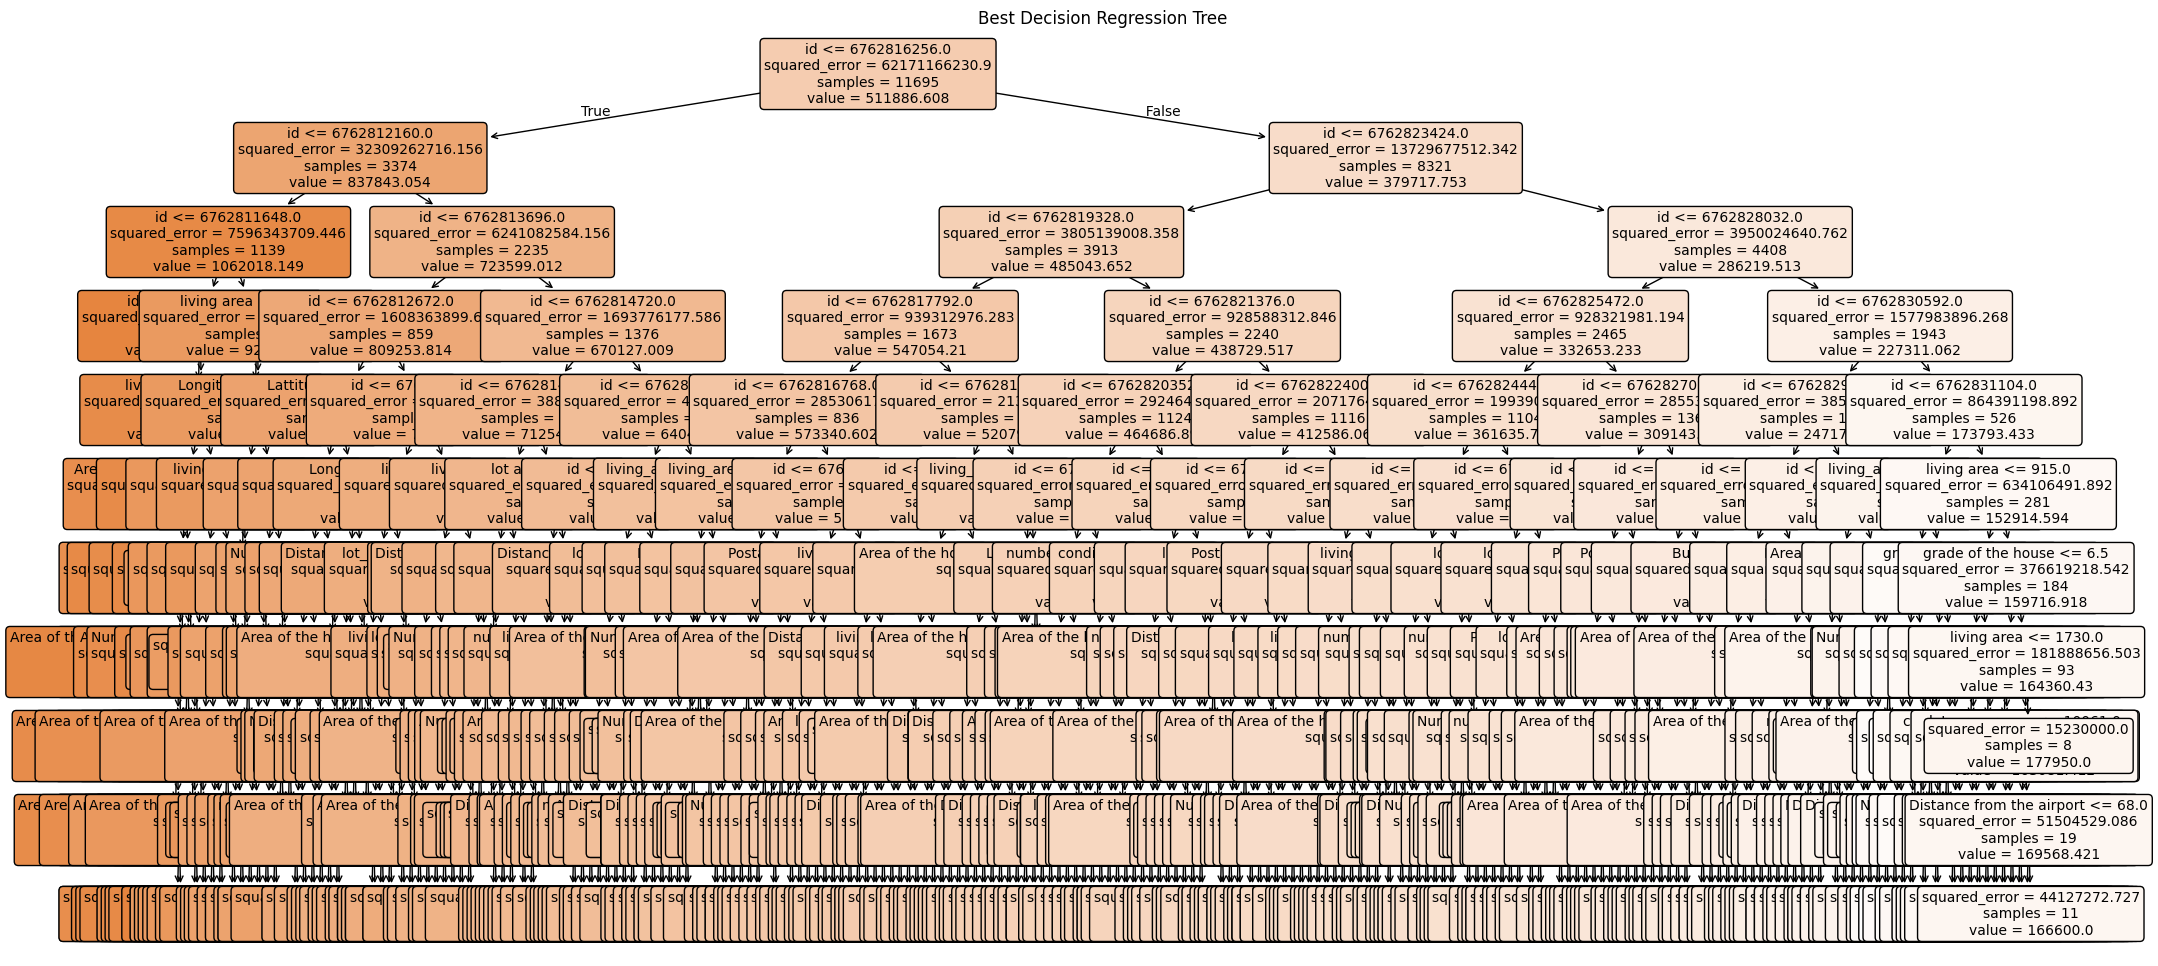

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(24,12))
plot_tree(
    best_tree,
    feature_names=X.columns,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Best Decision Regression Tree")
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train.values.ravel())

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

def evaluate_model(y_true, y_pred, dataset_name="Dataset"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{dataset_name} Metrics:")
    print(f"MAE  (Average Error)          : {mae:.2f}")
    print(f"MSE  (Penalizes large errors) : {mse:.2f}")
    print(f"RMSE (Interpretable large error): {rmse:.2f}")
    print(f"R² Score (Relative performance): {r2:.2f}")

# Evaluate on training data
evaluate_model(y_train, y_train_pred, "Training Set")

# Evaluate on test data
evaluate_model(y_test, y_test_pred, "Test Set")

param_grid = {
    'max_depth': [None] + list(np.arange(1, 21)), #height = dept
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 21),
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid = GridSearchCV(
      RandomForestRegressor(random_state=42),
      param_grid,
      cv=5,
      scoring='r2',
      n_jobs=-1
 )
grid.fit(X_train, y_train.values.ravel())


best_tree = grid.best_estimator_
y_test_pred_best = best_tree.predict(X_test)

print("\nBest hyperparameters found:", grid.best_params_)
evaluate_model(y_train, best_tree.predict(X_train), "Training Set (Best RF Tree)")
evaluate_model(y_test, y_test_pred_best, "Test Set (Best RF Tree)")


Training Set Metrics:
MAE  (Average Error)          : 2339.29
MSE  (Penalizes large errors) : 17579062.87
RMSE (Interpretable large error): 4192.74
R² Score (Relative performance): 1.00

Test Set Metrics:
MAE  (Average Error)          : 6233.52
MSE  (Penalizes large errors) : 119855672.52
RMSE (Interpretable large error): 10947.86
R² Score (Relative performance): 1.00


KeyboardInterrupt: 

In [ ]:
data


,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,1970-01-01 00:00:00.000042491,4.0,2.50,2920,4000.00,1.5,0,0,5.0,...,1909,0,122004,52.8878,-114.470,2470,4000.00,2,51,1132500
1,6762810998,1970-01-01 00:00:00.000042491,5.0,2.75,2910,9480.00,1.5,0,0,3.0,...,1939,0,122004,52.8852,-114.468,2940,6600.00,1,53,1132500
2,6762812605,1970-01-01 00:00:00.000042491,4.0,2.50,3310,19484.25,2.0,0,0,3.0,...,2001,0,122005,52.9532,-114.321,3350,17666.25,3,76,838000
3,6762812919,1970-01-01 00:00:00.000042491,3.0,2.00,2710,4500.00,1.5,0,0,4.0,...,1929,0,122006,52.9047,-114.485,2060,4500.00,1,51,805000
4,6762813105,1970-01-01 00:00:00.000042491,3.0,2.50,2600,4750.00,1.0,0,0,4.0,...,1951,0,122007,52.9133,-114.590,2380,4750.00,1,67,790000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14614,6762830250,1970-01-01 00:00:00.000042734,2.0,1.50,1556,19484.25,1.0,0,0,4.0,...,1957,0,122066,52.6191,-114.472,2250,17286.00,3,76,221700
14615,6762830339,1970-01-01 00:00:00.000042734,3.0,2.00,1680,7000.00,1.5,0,0,4.0,...,1968,0,122072,52.5075,-114.393,1540,7480.00,3,59,219200
14616,6762830618,1970-01-01 00:00:00.000042734,2.0,1.00,1070,6120.00,1.0,0,0,3.0,...,1962,0,122056,52.7289,-114.507,1130,6120.00,2,64,209000
14617,6762830709,1970-01-01 00:00:00.000042734,4.0,1.00,1030,6621.00,1.0,0,0,4.0,...,1955,0,122042,52.7157,-114.411,1420,6631.00,3,54,205000


In [ ]:
data['Price_class'] = data['Price'].apply(lambda x: 'High' if x >= 950000 else 'Low')

In [ ]:
data.head(300)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price,Price_class
0,6762810635,1970-01-01 00:00:00.000042491,4.0,2.50,2920,4000.00,1.5,0,0,5.0,...,0,122004,52.8878,-114.470,2470,4000.00,2,51,1132500,High
1,6762810998,1970-01-01 00:00:00.000042491,5.0,2.75,2910,9480.00,1.5,0,0,3.0,...,0,122004,52.8852,-114.468,2940,6600.00,1,53,1132500,High
2,6762812605,1970-01-01 00:00:00.000042491,4.0,2.50,3310,19484.25,2.0,0,0,3.0,...,0,122005,52.9532,-114.321,3350,17666.25,3,76,838000,Low
3,6762812919,1970-01-01 00:00:00.000042491,3.0,2.00,2710,4500.00,1.5,0,0,4.0,...,0,122006,52.9047,-114.485,2060,4500.00,1,51,805000,Low
4,6762813105,1970-01-01 00:00:00.000042491,3.0,2.50,2600,4750.00,1.0,0,0,4.0,...,0,122007,52.9133,-114.590,2380,4750.00,1,67,790000,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,6762822055,1970-01-01 00:00:00.000042496,2.0,1.50,1040,3500.00,1.5,0,0,4.0,...,0,122054,52.8180,-114.494,1340,1213.00,2,72,420000,Low
296,6762822056,1970-01-01 00:00:00.000042496,3.0,2.25,1770,8165.00,2.0,0,0,3.0,...,0,122033,52.9466,-114.426,1650,8165.00,2,73,420000,Low
297,6762822226,1970-01-01 00:00:00.000042496,3.0,2.25,1606,1452.00,3.0,0,0,3.0,...,0,122022,52.9475,-114.474,1516,1939.00,2,71,417250,Low
298,6762822267,1970-01-01 00:00:00.000042496,4.0,3.00,1830,9548.00,2.0,0,0,3.0,...,0,122058,52.9679,-114.414,1740,9750.00,1,66,415000,Low


In [ ]:

from sklearn.preprocessing import StandardScaler
from  sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X  = data.drop(['Price', 'Price_class', 'Date'], axis=1)
Y  = data['Price_class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# knn applying  default k = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
# prediction
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)
print("Training Accuracy:", accuracy_score(Y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(Y_test, y_test_pred))
print("classification:", classification_report(Y_test, y_test_pred))
print("confusion matrix:", confusion_matrix(Y_test, y_test_pred))

Training Accuracy: 0.9678495083368961
Testing Accuracy: 0.9548563611491108
classification:               precision    recall  f1-score   support

        High       0.80      0.62      0.70       246
         Low       0.97      0.99      0.98      2678

    accuracy                           0.95      2924
   macro avg       0.88      0.80      0.84      2924
weighted avg       0.95      0.95      0.95      2924

confusion matrix: [[ 152   94]
 [  38 2640]]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create an SVM classifier with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the model
svm_model.fit(X_train, Y_train)

# Make predictions on the training and test sets
y_train_pred_svm = svm_model.predict(X_train)
y_test_pred_svm = svm_model.predict(X_test)

# Evaluate the model
print("\n--- Support Vector Machine (SVM) Model Evaluation ---")
print("Training Accuracy (SVM):", accuracy_score(Y_train, y_train_pred_svm))
print("Testing Accuracy (SVM):", accuracy_score(Y_test, y_test_pred_svm))
print("\nClassification Report (SVM, Test Set):\n", classification_report(Y_test, y_test_pred_svm))
print("\nConfusion Matrix (SVM, Test Set):\n", confusion_matrix(Y_test, y_test_pred_svm))


--- Support Vector Machine (SVM) Model Evaluation ---
Training Accuracy (SVM): 0.9970072680632749
Testing Accuracy (SVM): 0.9958960328317373

Classification Report (SVM, Test Set):
               precision    recall  f1-score   support

        High       0.96      1.00      0.98       246
         Low       1.00      1.00      1.00      2678

    accuracy                           1.00      2924
   macro avg       0.98      1.00      0.99      2924
weighted avg       1.00      1.00      1.00      2924


Confusion Matrix (SVM, Test Set):
 [[ 245    1]
 [  11 2667]]


Observations

Proper data preprocessing significantly improved model

performance

Feature scaling was critical for KNN, SVM, and Linear Regression

Random Forest handled non-linearity and feature interactions effectively

Outlier treatment improved RMSE and MAE values

🧾 **Conclusion**

This project demonstrates that clean data and proper preprocessing are more important than choosing complex models. Among all tested algorithms, Random Forest Regressor performed best for house price prediction due to its ability to handle non-linear relationships and outliers.